In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
from sqlalchemy import Column, Integer, String, ForeignKey, create_engine
from sqlalchemy.orm import declarative_base, relationship, sessionmaker

In [2]:
vg_sales = pd.read_csv('vgsales.csv')
vg_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [3]:
vg_sales.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

# MCD
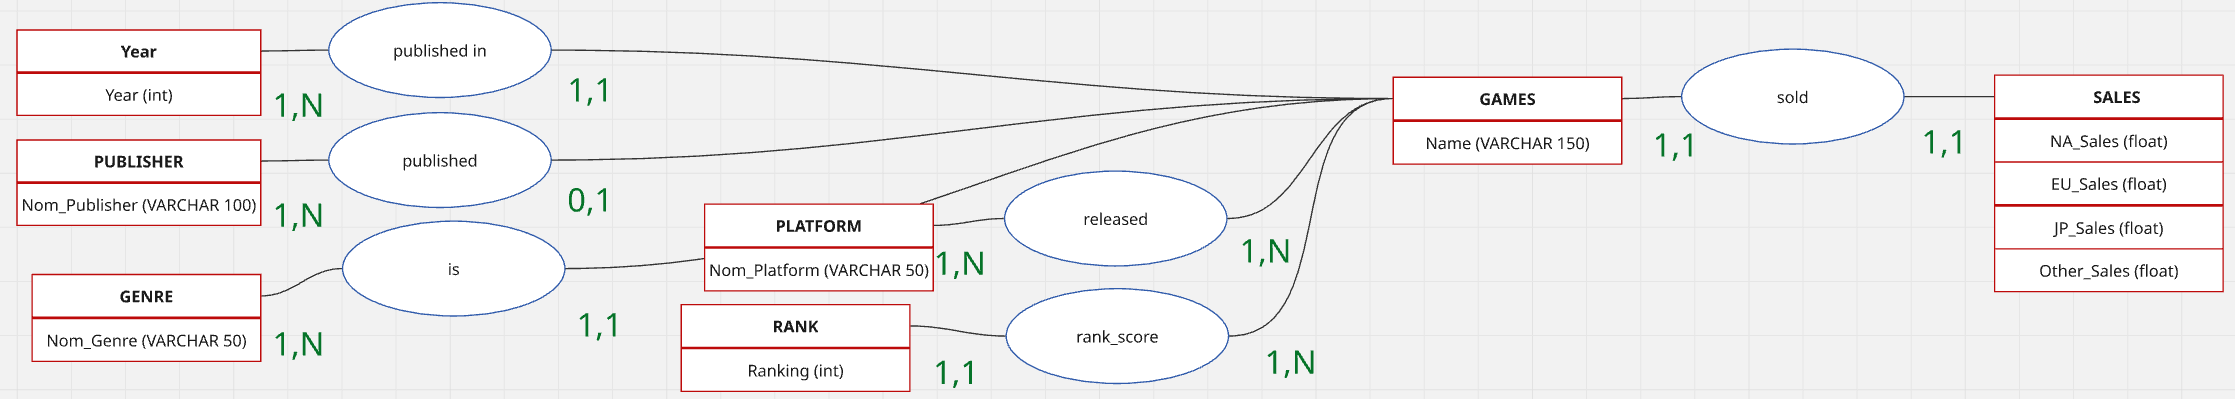
# MLD
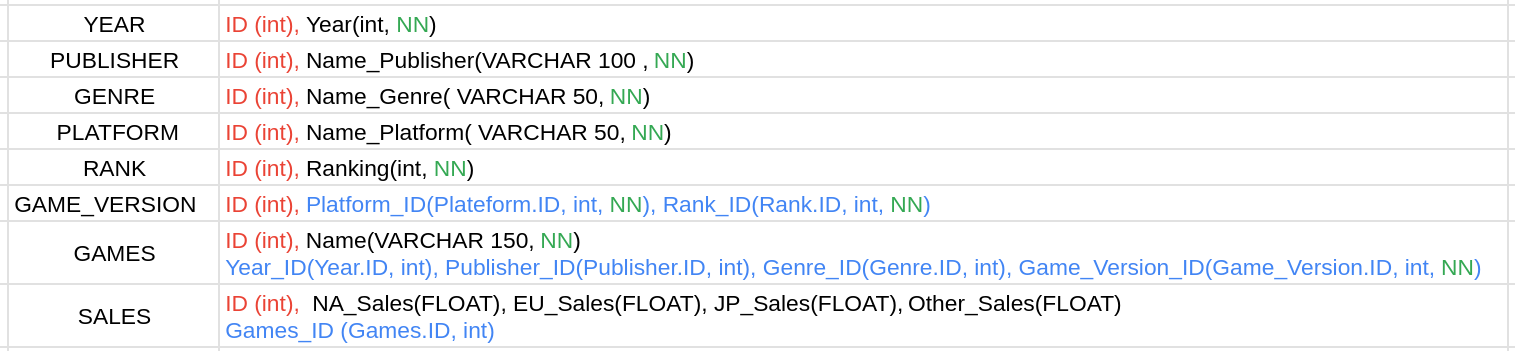
# MPD
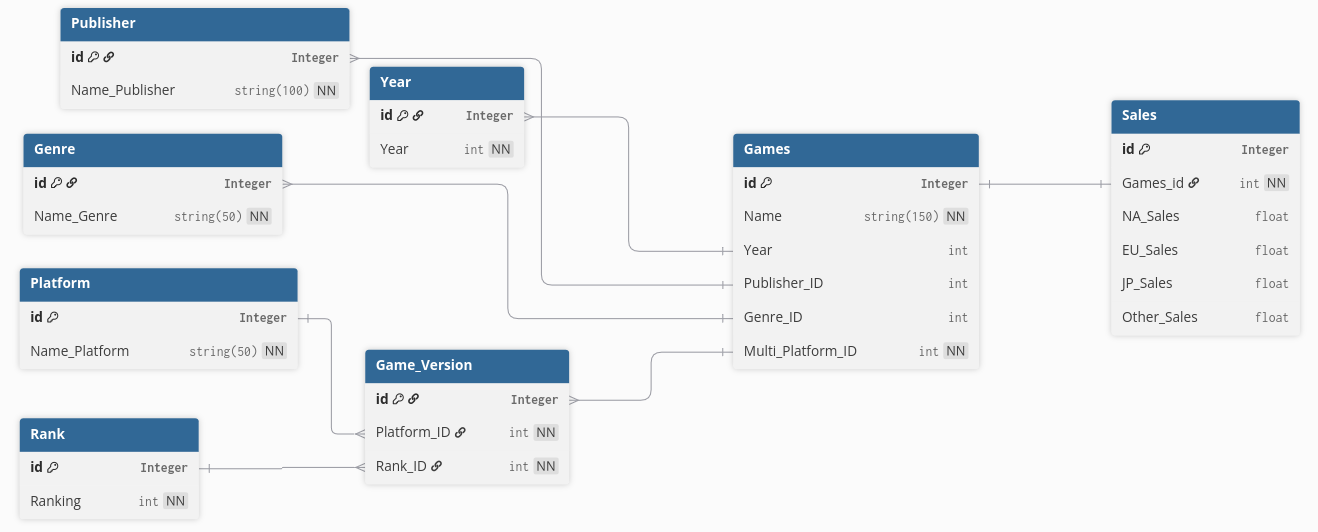

In [4]:
Base = declarative_base()

class Platform(Base):
    __tablename__='platforms'

    id = Column(Integer, primary_key=True)
    name = Column(String)

    game_versions_for_platform = relationship('GameVersion', back_populates= 'platform')


class Rank(Base):
    __tablename__='ranks'

    id = Column(Integer, primary_key=True)
    ranking = Column(Integer)

    game_versions_for_rank = relationship('GameVersion', back_populates= 'rank')

class GameVersion(Base):
    __tablename__ = 'game_versions'

    id = Column(Integer, primary_key=True)

    platform_id = Column(Integer, ForeignKey('platforms.id'))
    platform = relationship('Platform', back_populates= 'game_versions_for_platform')

    rank_id = Column(Integer, ForeignKey('ranks.id'))
    rank = relationship('Rank', back_populates= 'game_versions_for_rank')

class Publisher(Base):
    __tablename__ = 'publishers'

    id = Column(Integer, primary_key=True)
    name = Column(String)

    game = relationship('Game', back_populates='publisher')

class Genre(Base):
    __tablename__ = 'genres'

    id = Column(Integer, primary_key=True)
    name = Column(String)

    game = relationship('Game', back_populates='genre')

class Year(Base):
    __tablename__ = 'years'

    id = Column(Integer, primary_key=True)
    year_date = Column(Integer)

    game_for_year = relationship('Game', back_populates='year')

class Game(Base):
    __tablename__ = 'games'

    id = Column(Integer, primary_key=True)
    name = Column(String)

    year_id = Column(Integer, ForeignKey('years.id'))
    year = relationship('Year', back_populates='game_for_year')

    publisher_id = Column(Integer, ForeignKey('publishers.id'))
    publisher = relationship ('Publisher', back_populates='game')

    genre_id = Column(Integer, ForeignKey('genres.id'))
    genre = relationship('Genre', back_populates='game')

    sale = relationship('Sale', back_populates='game_for_sale')

    transaction = relationship('Transaction', back_populates='game_for_transaction')

class Sale(Base):
    __tablename__ = 'sales'

    id = Column (Integer, primary_key=True)
    na_sales = Column(Integer)
    eu_sales = Column(Integer)
    jp_sales = Column(Integer)
    other_sales = Column(Integer)

    game_id = Column(Integer, ForeignKey('games.id'))
    game_for_sale = relationship('Game', back_populates='sale')

class Transaction(Base):
    __tablename__ = 'transactions'

    id = Column(Integer, primary_key=True)
    quantity = Column (Integer, nullable=False)

    game_id = Column(Integer, ForeignKey('games.id'))
    game_for_transaction = relationship('Game', back_populates='transaction')

In [5]:
engine = create_engine("sqlite:///video_games_sales.db", echo=True)

Base.metadata.create_all(engine)

Session = sessionmaker(bind=engine)
session = Session()


2025-11-28 14:08:45,742 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-28 14:08:45,743 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("platforms")
2025-11-28 14:08:45,743 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 14:08:45,744 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("ranks")
2025-11-28 14:08:45,745 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 14:08:45,746 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("game_versions")
2025-11-28 14:08:45,746 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 14:08:45,747 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("publishers")
2025-11-28 14:08:45,748 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 14:08:45,748 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("genres")
2025-11-28 14:08:45,749 INFO sqlalchemy.engine.Engine [raw sql] ()
2025-11-28 14:08:45,749 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("years")
2025-11-28 14:08:45,750 INFO sqlalchemy.engine.Engine [raw s

In [7]:
Session.dispose()

AttributeError: 'sessionmaker' object has no attribute 'dispose'

In [ ]:
query = session.query(GameVersion)
print(query)

SELECT game_versions.id AS game_versions_id, game_versions.platform_id AS game_versions_platform_id, game_versions.rank_id AS game_versions_rank_id 
FROM game_versions
